In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardetection/video.mp4
/kaggle/input/cardetection/car/README.dataset.txt
/kaggle/input/cardetection/car/README.roboflow.txt
/kaggle/input/cardetection/car/data.yaml
/kaggle/input/cardetection/car/valid/labels/000825_jpg.rf.5217db7b554510a418092e5f2aa43864.txt
/kaggle/input/cardetection/car/valid/labels/001638_JPG_jpg.rf.2a3d2a331eb8c9bf6afc868c6da103c8.txt
/kaggle/input/cardetection/car/valid/labels/road672_png.rf.399722f8bd34dc5991633bbbe681cc47.txt
/kaggle/input/cardetection/car/valid/labels/00004_00037_00010_png.rf.2d548b82f656367528a9b69d5b6b82cf.txt
/kaggle/input/cardetection/car/valid/labels/00014_00009_00012_png.rf.02ffbac072397fe4f36979ba80f74fb9.txt
/kaggle/input/cardetection/car/valid/labels/00014_00010_00001_png.rf.68c586d3ac58ed9ad2b5b51c2702b4cf.txt
/kaggle/input/cardetection/car/valid/labels/00000_00003_00002_png.rf.76d9ce9f361d1b20eb1b0d5c4d9356b7.txt
/kaggle/input/cardetection/car/valid/labels/road359_png.rf.c4125f36b26194a2c30d623150bf73bf.txt
/kaggle/inp

In [2]:
# Install Essential Libraries
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 14.0 MB/s eta 0:00:00a 0:00:01


In [3]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

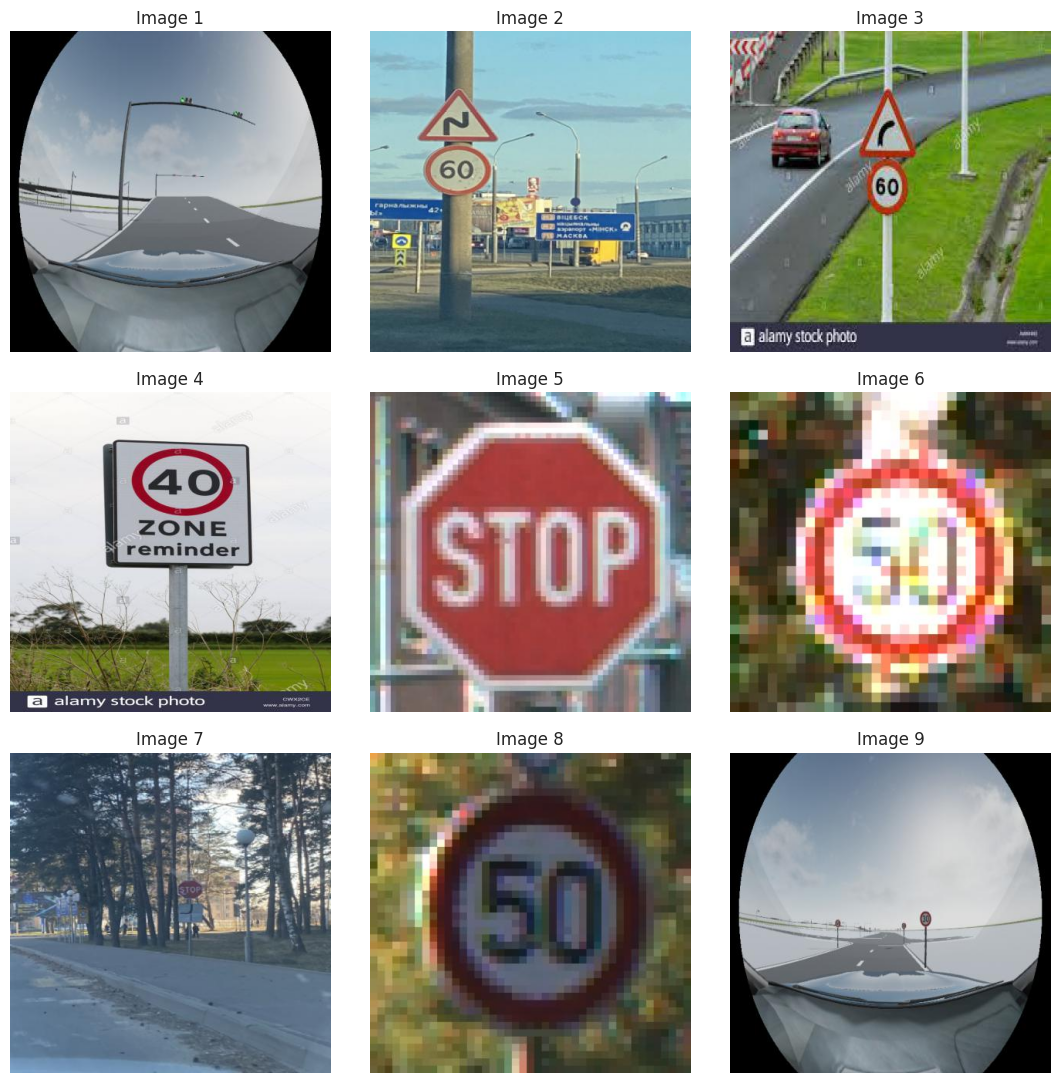

In [5]:
Image_dir = '/kaggle/input/cardetection/car/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [6]:
# Get the size of the image
image = cv2.imread("/kaggle/input/cardetection/car/train/images/00000_00000_00012_png.rf.23f94508dba03ef2f8bd187da2ec9c26.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.



image 1/1 /kaggle/input/cardetection/car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg: 640x640 (no detections), 9.0ms
Speed: 2.4ms preprocess, 9.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


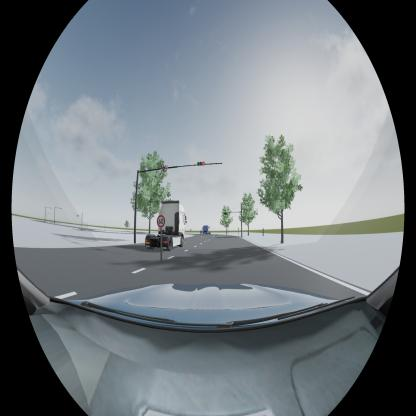

In [8]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt") 

# Use the model to detect object
image = "/kaggle/input/cardetection/car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [9]:
!pip install --upgrade ultralytics ray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 MB 23.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: ray
    Found existing installation: ray 2.24.0
    Uninstalling ray-2.24.0:
      Successfully uninstalled ray-2.24.0


In [10]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.pt')  

# Training The Final Model
Result_Final_model = Final_model.train(data="/kaggle/input/cardetection/car/data.yaml",epochs = 30, batch = -1, optimizer = 'auto')

Ultralytics 8.3.27 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/cardetection/car/data.yaml, epochs=30, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

100%|██████████| 755k/755k [00:00<00:00, 4.58MB/s]
2024-11-02 07:53:02,969	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-11-02 07:53:03,205	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 22.0MB/s]


AMP: checks passed ✅
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 0.11G reserved, 0.07G allocated, 14.56G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     3013773       8.209         0.201         45.31         184.9        (1, 3, 640, 640)                    list
     3013773       16.42         0.308         23.53         49.16        (2, 3, 640, 640)                    list
     3013773       32.84         0.549         25.09         48.63        (4, 3, 640, 640)                    list
     3013773       65.67         0.990         30.34         51.61        (8, 3, 640, 640)                    list
     3013773       131.3         1.921         50.74         65.91       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 75 for CUDA:0 8.86G/14.74G (60%) ✅


train: Scanning /kaggle/input/cardetection/car/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:16<00:00, 211.69it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/cardetection/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:04<00:00, 191.31it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005859375), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      9.72G     0.8935      3.839      1.227         11        640: 100%|██████████| 48/48 [00:36<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.03it/s]

                   all        801        944     0.0399      0.749      0.111     0.0963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      9.66G     0.7449       2.73      1.092          9        640: 100%|██████████| 48/48 [00:34<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        801        944      0.334      0.373      0.236      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      9.65G     0.7333      2.307      1.081          6        640: 100%|██████████| 48/48 [00:34<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        801        944      0.333      0.615       0.41      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30       9.7G     0.7232      1.966      1.071          7        640: 100%|██████████| 48/48 [00:34<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]

                   all        801        944       0.61      0.546      0.611      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      9.71G     0.6929      1.632      1.048         11        640: 100%|██████████| 48/48 [00:34<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.20it/s]

                   all        801        944      0.727      0.689      0.741      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      9.65G     0.6803      1.409      1.033         12        640: 100%|██████████| 48/48 [00:35<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        801        944      0.685      0.644       0.71      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      9.73G     0.6713      1.287       1.03         11        640: 100%|██████████| 48/48 [00:34<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        801        944      0.831      0.746       0.82      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      9.64G     0.6519      1.168      1.021         13        640: 100%|██████████| 48/48 [00:34<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.14it/s]

                   all        801        944      0.855      0.728      0.842      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      9.67G      0.634      1.118      1.011         16        640: 100%|██████████| 48/48 [00:34<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.28it/s]

                   all        801        944      0.892      0.765      0.863      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      9.64G     0.6111      1.006     0.9981          9        640: 100%|██████████| 48/48 [00:35<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.26it/s]

                   all        801        944      0.917      0.793      0.895      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      9.71G     0.6168     0.9877      1.001         10        640: 100%|██████████| 48/48 [00:34<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        801        944      0.873       0.78      0.877      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      9.65G     0.6095     0.9499          1          9        640: 100%|██████████| 48/48 [00:34<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.18it/s]

                   all        801        944      0.903       0.82      0.907      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30       9.7G     0.5994     0.8864     0.9984          9        640: 100%|██████████| 48/48 [00:34<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        801        944      0.885      0.807      0.899      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      9.67G     0.5936     0.8609     0.9907          7        640: 100%|██████████| 48/48 [00:34<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.17it/s]

                   all        801        944      0.923      0.829      0.922       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      9.64G      0.582     0.8194     0.9858         11        640: 100%|██████████| 48/48 [00:34<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        801        944      0.944      0.822      0.919      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      9.64G     0.5809     0.7837     0.9806          6        640: 100%|██████████| 48/48 [00:34<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.17it/s]

                   all        801        944       0.93      0.838      0.927      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      9.65G     0.5777     0.7762     0.9807          8        640: 100%|██████████| 48/48 [00:34<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.27it/s]

                   all        801        944      0.952      0.839       0.93      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30       9.7G     0.5693     0.7492      0.976         10        640: 100%|██████████| 48/48 [00:34<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        801        944      0.939      0.838       0.93      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      9.67G     0.5727     0.7315     0.9776          7        640: 100%|██████████| 48/48 [00:35<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        801        944      0.925      0.859      0.936      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30       9.7G     0.5487     0.6907     0.9631          7        640: 100%|██████████| 48/48 [00:34<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        801        944      0.925      0.874      0.944      0.813


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      9.63G      0.565     0.5579     0.9426          7        640: 100%|██████████| 48/48 [00:36<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        801        944      0.938      0.863      0.941      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      9.59G     0.5529     0.5194     0.9332          5        640: 100%|██████████| 48/48 [00:33<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.27it/s]

                   all        801        944      0.947      0.864      0.946      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      9.63G     0.5406     0.4835     0.9327          6        640: 100%|██████████| 48/48 [00:32<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.26it/s]

                   all        801        944      0.917      0.885      0.952      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      9.59G     0.5336     0.4715     0.9267          5        640: 100%|██████████| 48/48 [00:32<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        801        944      0.946      0.874       0.95      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30       9.7G     0.5248     0.4495     0.9249          7        640: 100%|██████████| 48/48 [00:32<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.26it/s]

                   all        801        944      0.948      0.877      0.954      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      9.63G     0.5166     0.4339     0.9204          5        640: 100%|██████████| 48/48 [00:32<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.27it/s]

                   all        801        944      0.941      0.904      0.957       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      9.63G     0.5213     0.4181      0.919          9        640: 100%|██████████| 48/48 [00:32<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.28it/s]

                   all        801        944      0.947      0.893      0.958      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      9.59G     0.5075     0.4081     0.9117          5        640: 100%|██████████| 48/48 [00:33<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        801        944      0.934      0.897      0.957      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      9.59G     0.4926     0.3913     0.9077          7        640: 100%|██████████| 48/48 [00:33<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.29it/s]

                   all        801        944      0.962      0.887      0.959       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      9.59G     0.4858     0.3808     0.9052          6        640: 100%|██████████| 48/48 [00:33<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        801        944      0.943        0.9      0.959      0.834



30 epochs completed in 0.336 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.13s/it]


                   all        801        944      0.943      0.899      0.959      0.834
           Green Light         87        122        0.9      0.742      0.863      0.533
             Red Light         74        108      0.859      0.704      0.822      0.502
       Speed Limit 100         52         52      0.933      0.942      0.984      0.893
       Speed Limit 110         17         17      0.789      0.941      0.964      0.893
       Speed Limit 120         60         60      0.974       0.95      0.993      0.913
        Speed Limit 20         56         56      0.986      0.982      0.986      0.872
        Speed Limit 30         71         74      0.963      0.959      0.983      0.923
        Speed Limit 40         53         55      0.931      0.964      0.989      0.891
        Speed Limit 50         68         71      0.961      0.859       0.97      0.867
        Speed Limit 60         76         76      0.958      0.899      0.966      0.878
        Speed Limit 7

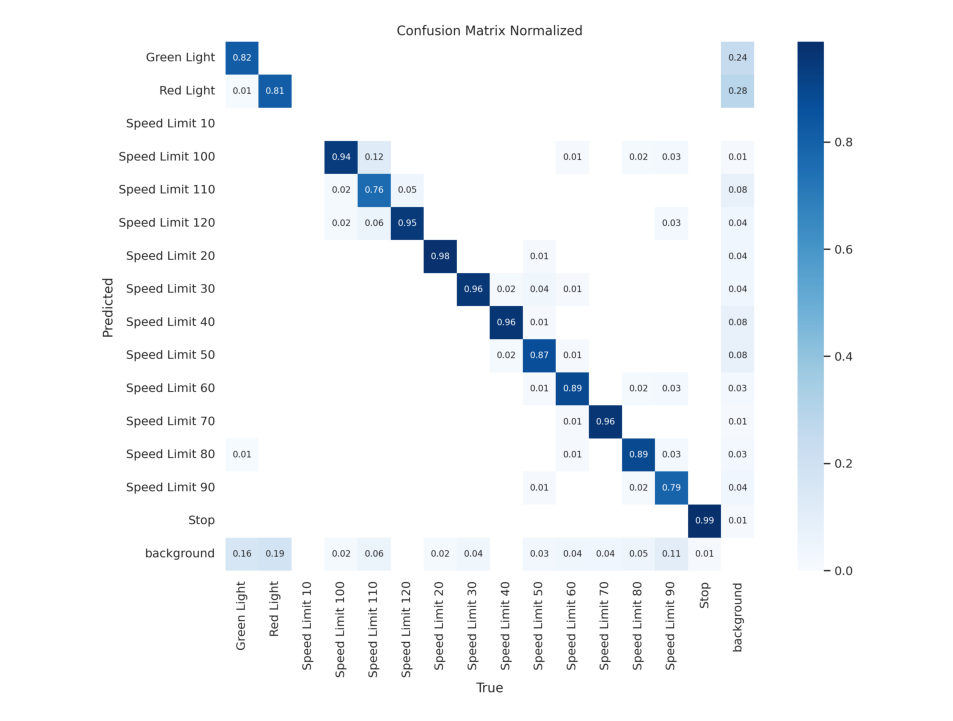

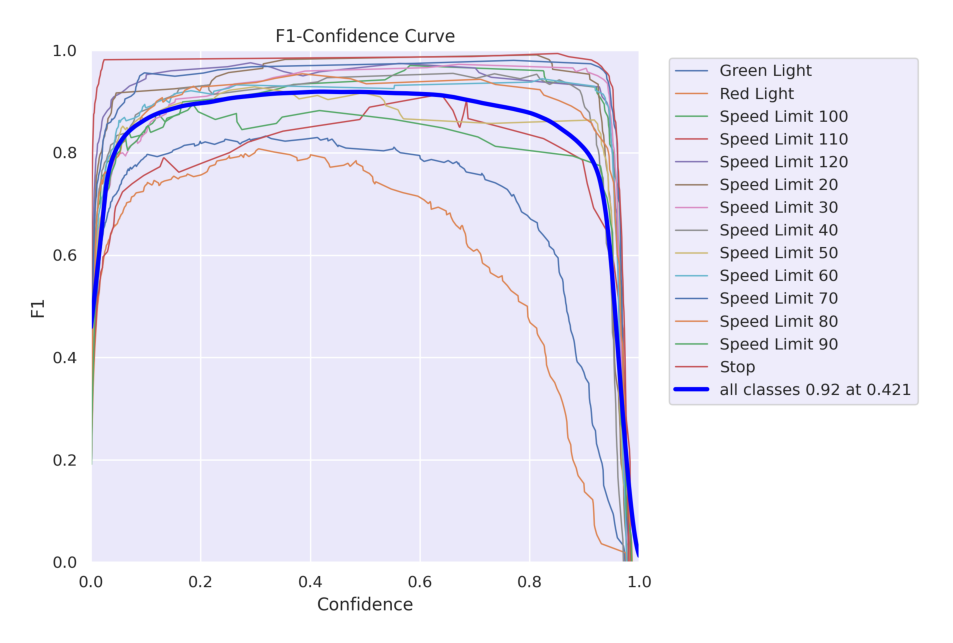

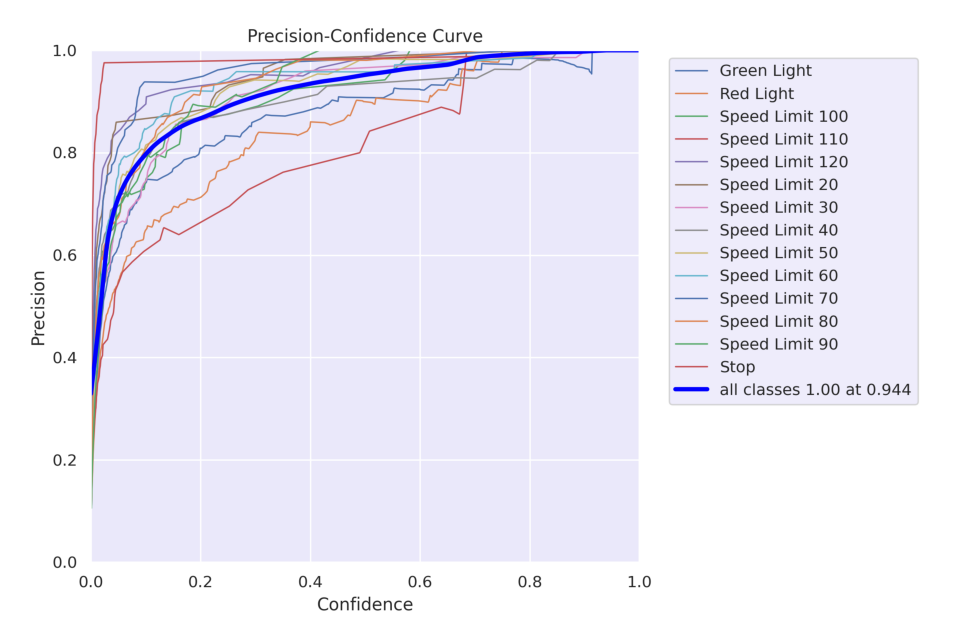

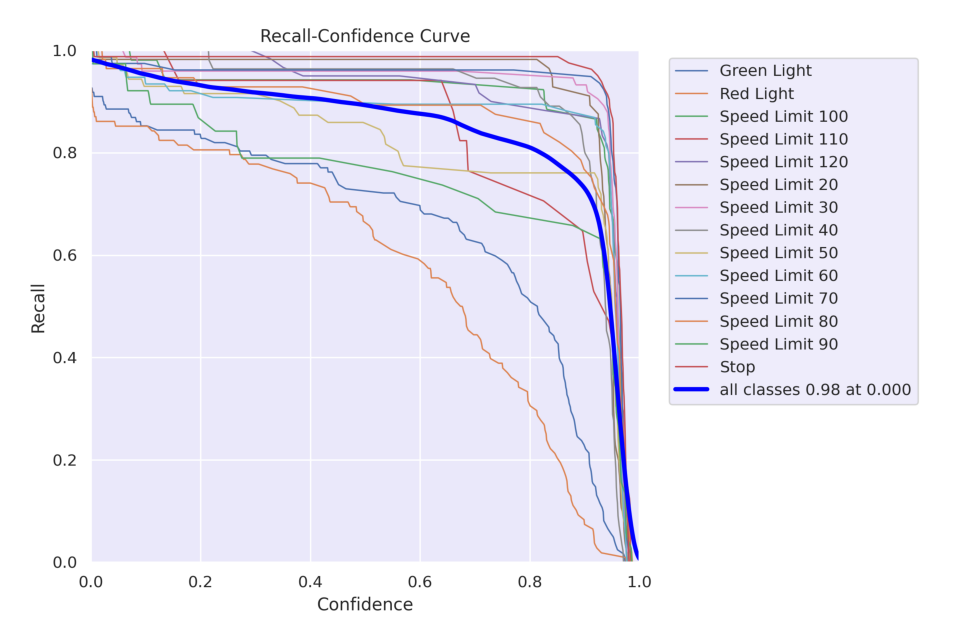

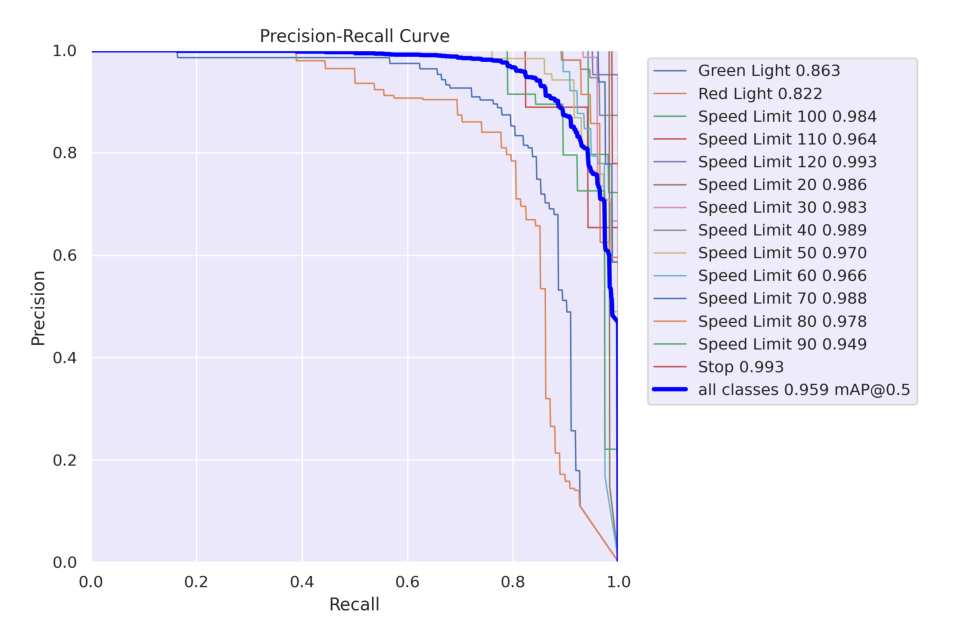

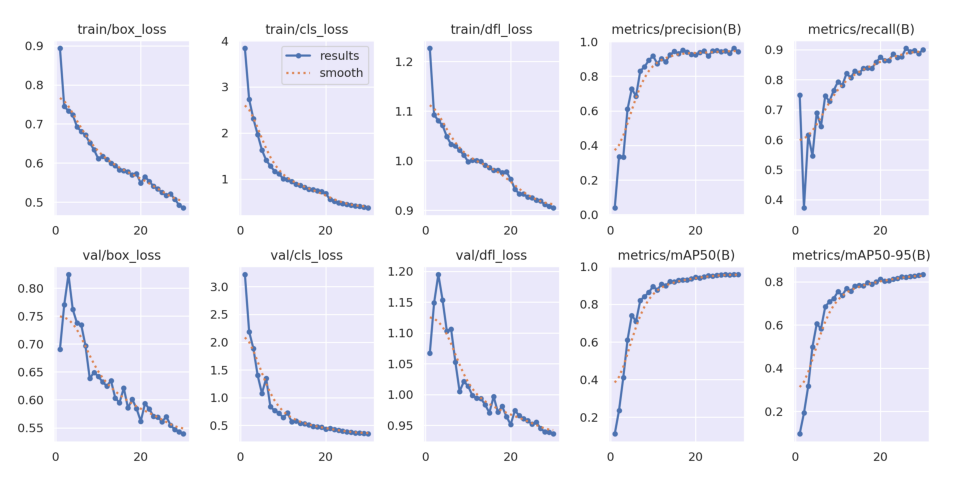

In [11]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = '/kaggle/working/runs/detect/train'

# Display the images
display_images(post_training_files_path, image_files)


In [12]:
Result_Final_model = pd.read_csv('/kaggle/working/runs/detect/train/results.csv')
Result_Final_model.tail(10)

epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
20     21   861.207         0.56502         0.55786         0.94258   
21     22   900.175         0.55295         0.51943         0.93324   
22     23   938.702         0.54062         0.48347         0.93271   
23     24   977.302         0.53356         0.47154         0.92666   
24     25  1015.500         0.52485         0.44954         0.92488   
25     26  1054.080         0.51658         0.43393         0.92037   
26     27  1092.580         0.52125         0.41811         0.91902   
27     28  1131.500         0.50751         0.40805         0.91171   
28     29  1170.530         0.49265         0.39130         0.90765   
29     30  1209.650         0.48578         0.38077         0.90519   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
20               0.93775            0.86301           0.94062   
21               0.94689            0.86384           0.94626   
22               0.91721            0.88540           0.95164   
23               0.94568            0.87421           0.94991   
24               0.94779            0.87666           0.95400   
25               0.94134            0.90431           0.95676   
26               0.94706            0.89334           0.95842   
27               0.93372            0.89706           0.95699   
28               0.96167            0.88703           0.95895   
29               0.94263            0.89975           0.95915   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
20              0.80282       0.59352       0.44781       0.97381  0.000179   
21              0.80468       0.58347       0.42583       0.96604  0.000161   
22              0.81192       0.57041       0.41084       0.96059  0.000144   
23              0.81628       0.56910       0.39676       0.95770  0.000127   
24              0.82320       0.56100       0.38026       0.95175  0.000109   
25              0.82041       0.56978       0.37602       0.95538  0.000092   
26              0.82418       0.55471       0.36476       0.94536  0.000075   
27              0.82693       0.54655       0.36340       0.93918  0.000057   
28              0.83036       0.54281       0.35449       0.93869  0.000040   
29              0.83385       0.53922       0.34845       0.93624  0.000023   

      lr/pg1    lr/pg2  
20  0.000179  0.000179  
21  0.000161  0.000161  
22  0.000144  0.000144  
23  0.000127  0.000127  
24  0.000109  0.000109  
25  0.000092  0.000092  
26  0.000075  0.000075  
27  0.000057  0.000057  
28  0.000040  0.000040  
29  0.000023  0.000023

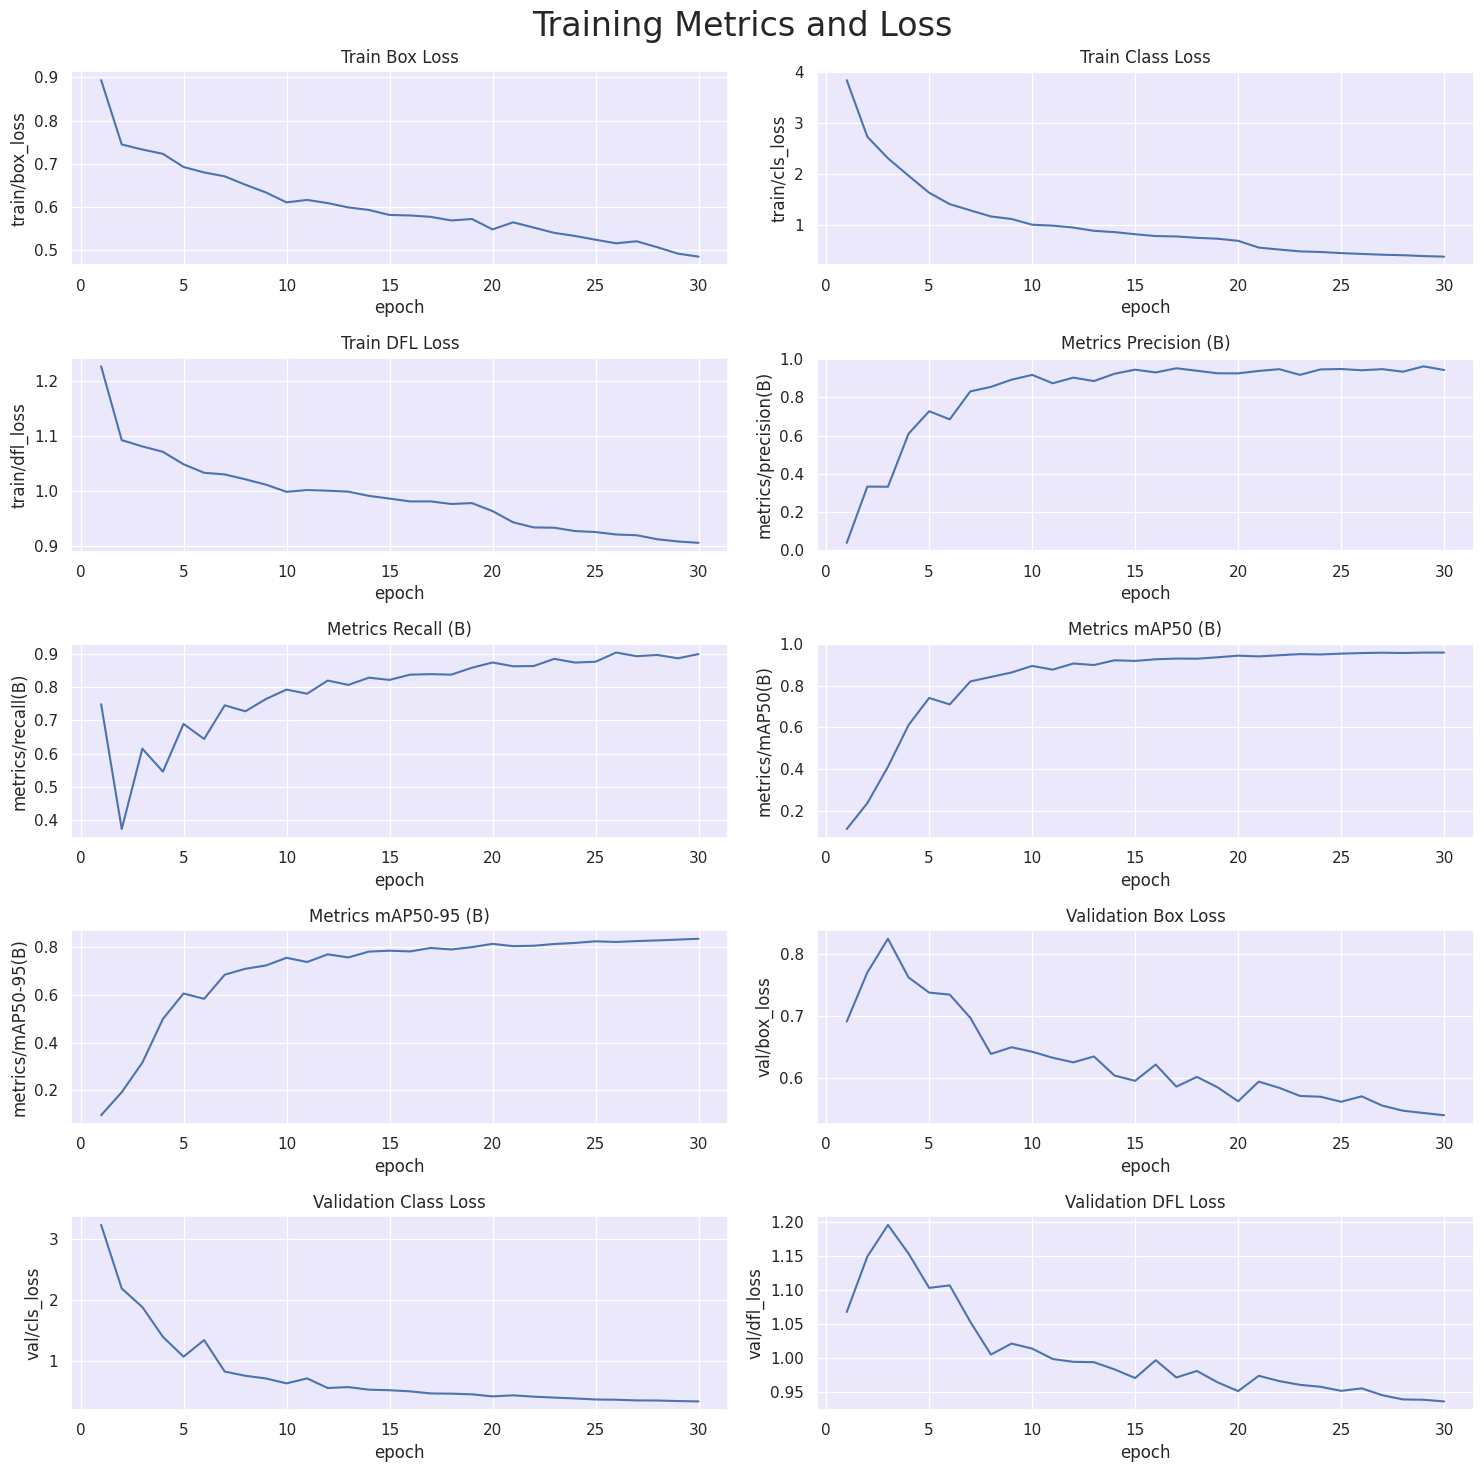

In [13]:
# Read the results.csv file as a pandas dataframe
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [14]:
# Loading the best performing model
Valid_model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Evaluating the model on the validset
metrics = Valid_model.val(split = 'val')

# final results 
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.27 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/cardetection/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:01<00:00, 651.99it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/valid is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:07<00:00,  7.27it/s]


                   all        801        944      0.943        0.9       0.96      0.834
           Green Light         87        122      0.901      0.747      0.867      0.538
             Red Light         74        108      0.858      0.704      0.823      0.501
       Speed Limit 100         52         52      0.933      0.942      0.984      0.892
       Speed Limit 110         17         17      0.788      0.941      0.964      0.893
       Speed Limit 120         60         60      0.973       0.95      0.993      0.917
        Speed Limit 20         56         56      0.986      0.982      0.986      0.874
        Speed Limit 30         71         74      0.963      0.959      0.983      0.921
        Speed Limit 40         53         55      0.931      0.964      0.989      0.888
        Speed Limit 50         68         71       0.96      0.859       0.97      0.865
        Speed Limit 60         76         76      0.958        0.9      0.965      0.877
        Speed Limit 7


0: 640x640 1 Speed Limit 50, 1 Speed Limit 80, 7.5ms
Speed: 1.7ms preprocess, 7.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Red Light, 1 Speed Limit 110, 7.4ms
Speed: 2.2ms preprocess, 7.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 120, 7.5ms
Speed: 2.0ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 40, 7.4ms
Speed: 1.6ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 120, 7.5ms
Speed: 2.0ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 120, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Stop, 7.4ms
Speed: 2.0ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 80, 7.4ms
Speed: 1.6ms pr

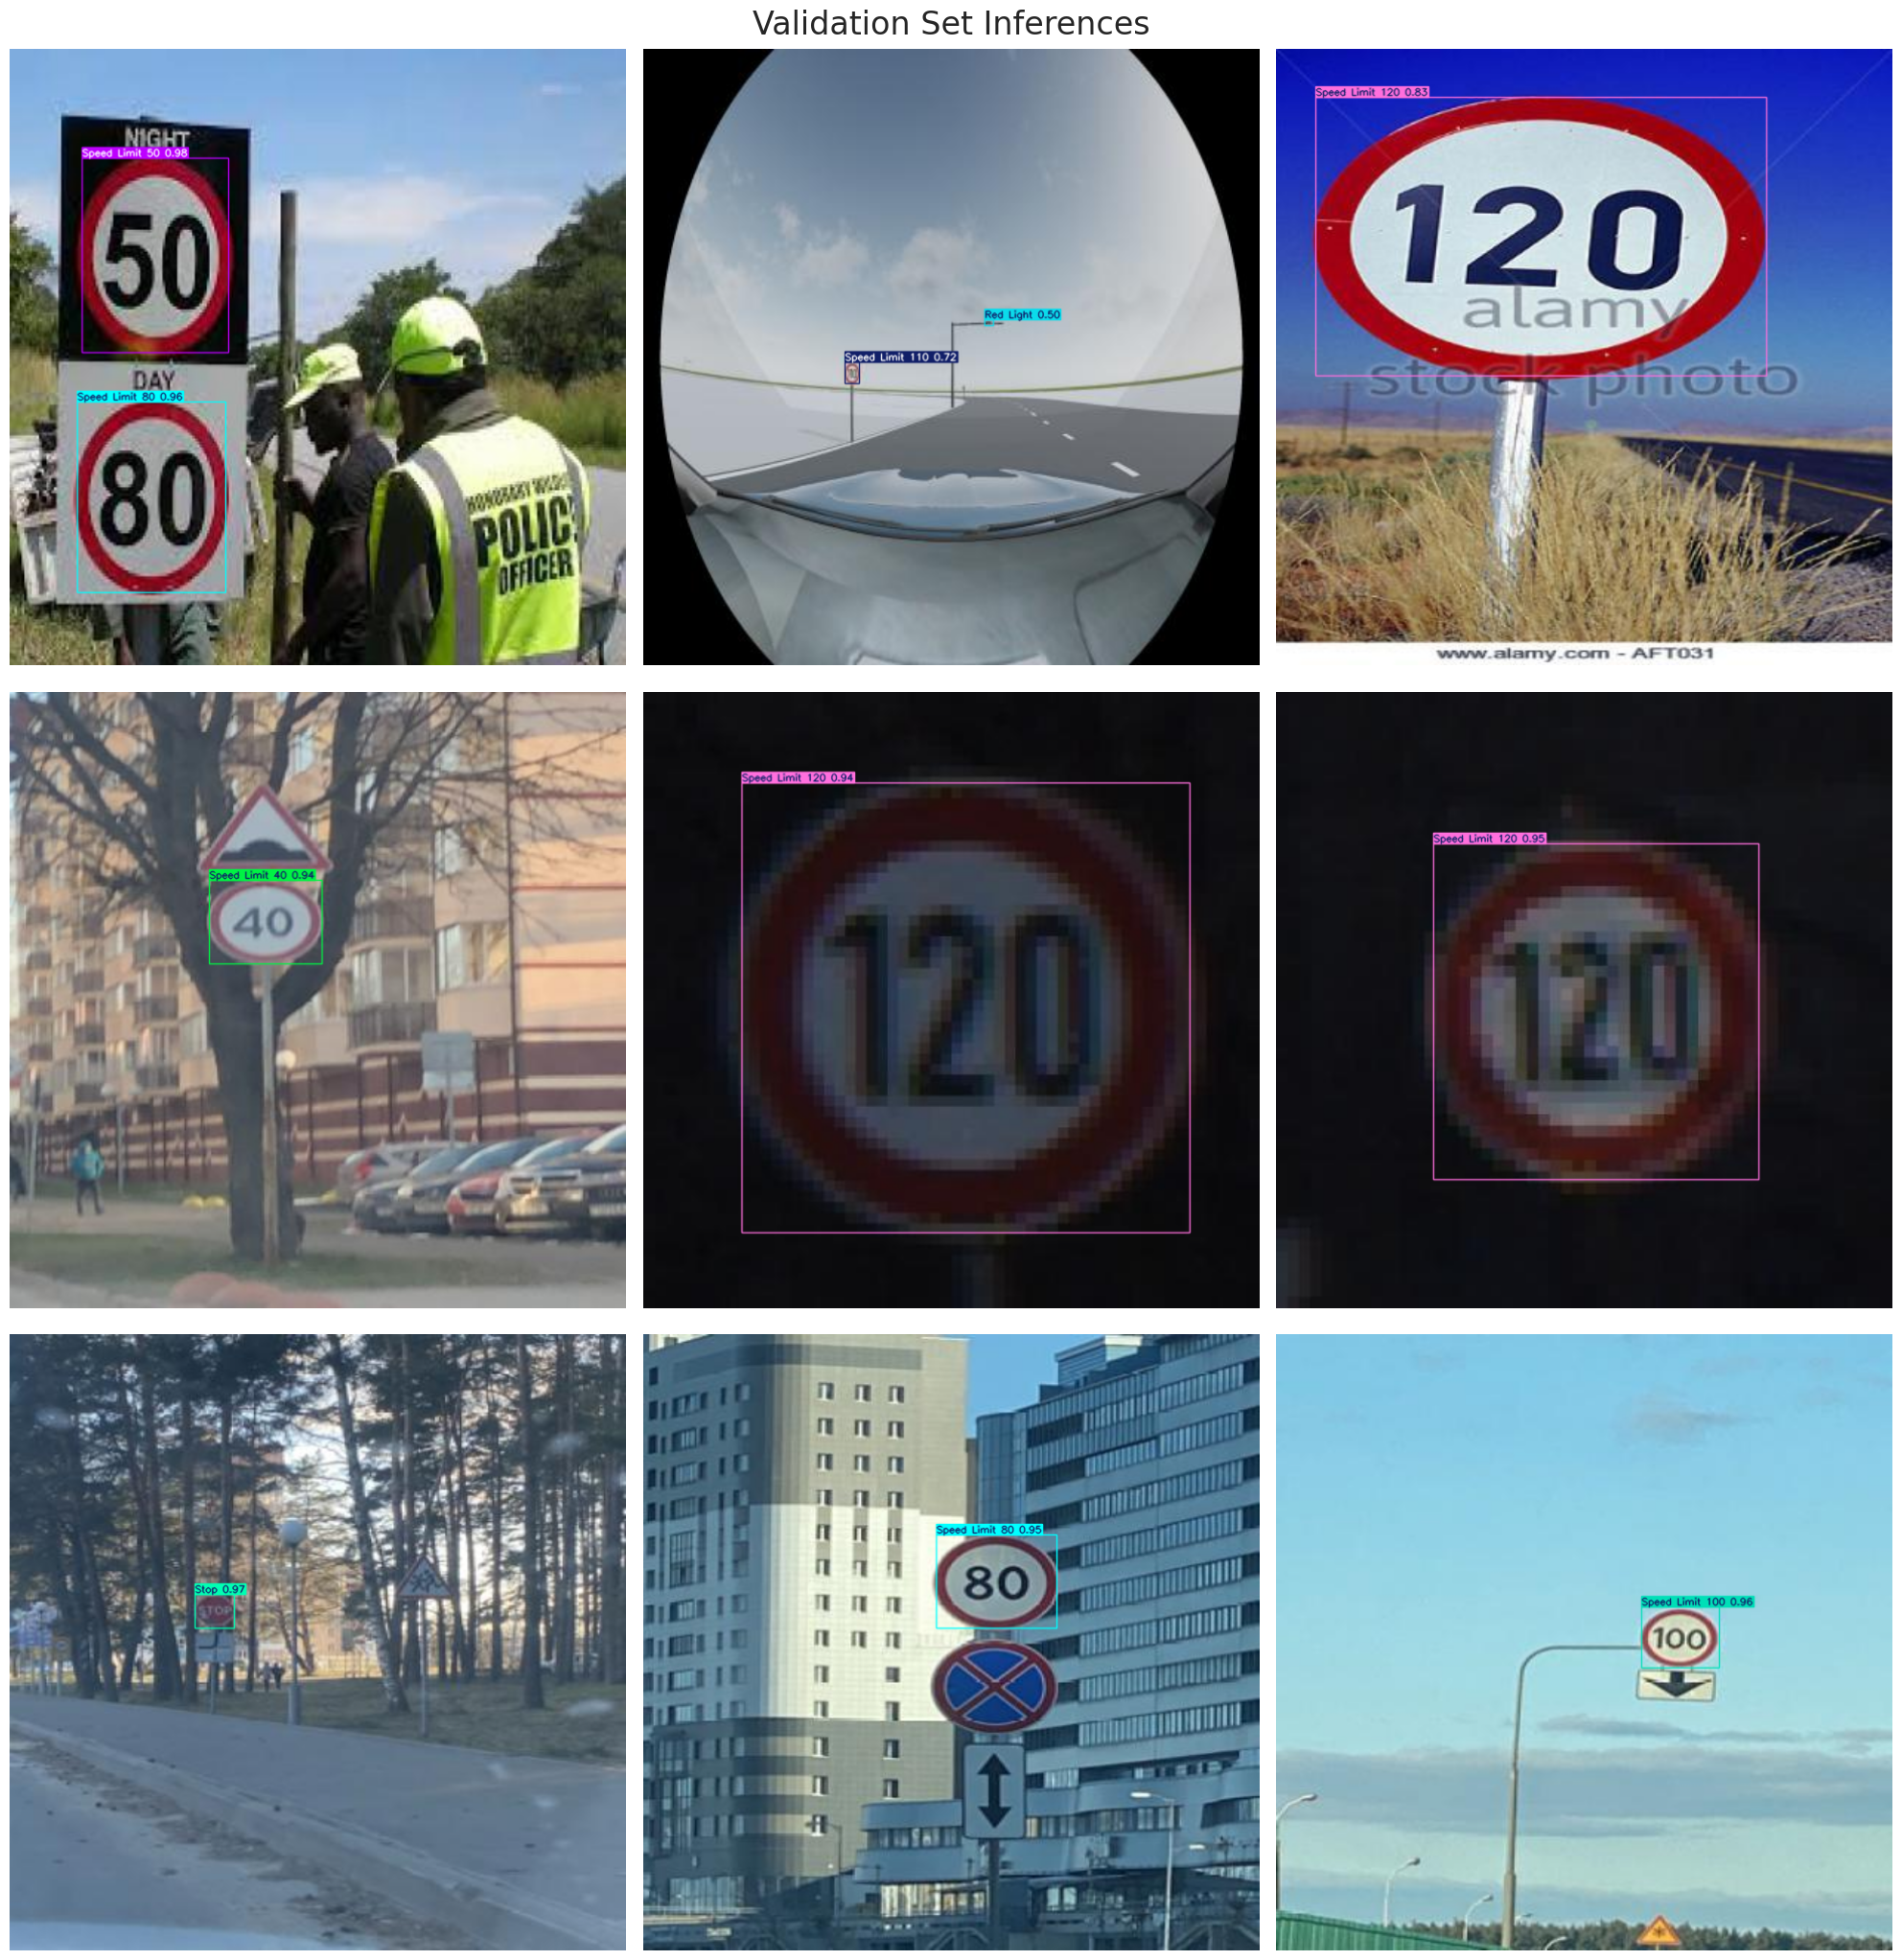

In [15]:
# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = '/kaggle/input/cardetection/car'  # Place your dataset path here
valid_images_path = os.path.join(dataset_path, 'test', 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select 9 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 9)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]
# Prepare subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])
            
            # Load image
            image = cv2.imread(image_path)
             # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = resize_image(image, size=(640, 640))
                # Normalize image
                normalized_image = normalize_image(resized_image)
                
                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)
                
                # Predict with the model
                results = Valid_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)
                
                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

In [22]:
# Export the model
Valid_model.export(format='onnx')

Ultralytics 8.3.27 🚀 Python-3.10.14 torch-2.4.0 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from '/kaggle/working/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 19, 8400) (6.0 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.36...
ONNX: export success ✅ 1.2s, saved as '/kaggle/working/runs/detect/train/weights/best.onnx' (11.7 MB)

Export complete (1.4s)
Results saved to /kaggle/working/runs/detect/train/weights
Predict:         yolo predict task=detect model=/kaggle/working/runs/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/kaggle/working/runs/detect/train/weights/best.onnx imgsz=640 data=/kaggle/input/cardetection/car/data.yaml  
Visualize:       https://netron.app


'/kaggle/working/runs/detect/train/weights/best.onnx'

In [24]:
print(Valid_model)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
   

In [27]:
import os

# Check if the file exists
image_path = "/kaggle/input/cardetection/car/test/images/000006_jpg.rf.89610ec419ccfab22f8314026b90ee26.jpg"
print("File exists:", os.path.isfile(image_path))


File exists: True


In [28]:
import cv2

# Attempt to load the image
img = cv2.imread(image_path)
if img is not None:
    print("Image loaded successfully with shape:", img.shape)
else:
    print("Failed to load image.")

Image loaded successfully with shape: (416, 416, 3)



0: 640x640 1 Speed Limit 30, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


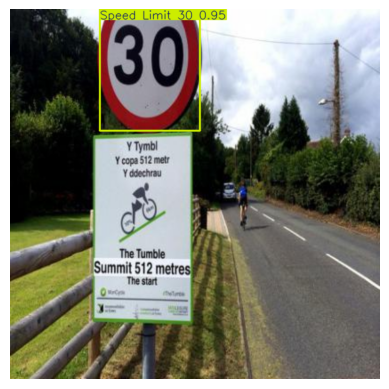

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load the trained model
Valid_model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Load the image
image_path = "/kaggle/input/cardetection/car/test/images/000006_jpg.rf.89610ec419ccfab22f8314026b90ee26.jpg"
img = cv2.imread(image_path)

if img is not None:
    # Resize image if it is not 640x640
    if img.shape[0] != 640 or img.shape[1] != 640:
        img = cv2.resize(img, (640, 640))
    
    # Normalize image
    img_normalized = img / 255.0  # Normalize to [0, 1]
    
    # Convert back to uint8 for predictions
    img_uint8 = (img_normalized * 255).astype(np.uint8)

    # Make predictions with the model
    finalresults = Valid_model.predict(source=img_uint8, imgsz=640, conf=0.5)

    # Display the annotated image
    annotated_image = finalresults[0].plot()

    # Ensure the annotated image is in the correct format for cv2
    if annotated_image.dtype != np.uint8:
        annotated_image = (annotated_image * 255).astype(np.uint8)

    # Convert the annotated image from BGR to RGB for proper color display in Matplotlib
    annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
    
    # Use Matplotlib to display the image
    plt.imshow(annotated_image_rgb)
    plt.axis('off')  # Hide axis
    plt.show()
else:
    print("Failed to load image.")
